In [68]:
import pandas as pd
import numpy as np


In [69]:
pd.read_csv="/content/online_course.ipynb"

In [70]:
with open('/content/online_course.ipynb', 'r') as f:
    notebook_content = f.read()

print(notebook_content)

{
 "cells": [
  {
   "cell_type": "markdown",
   "id": "6f47ddcb-4395-4dc7-8819-a2bd9ba4ad40",
   "metadata": {
    "id": "6f47ddcb-4395-4dc7-8819-a2bd9ba4ad40"
   },
   "source": [
    "## Data Cleaning and EDA"
   ]
  },
  {
   "cell_type": "markdown",
   "id": "db22023b-4c27-4ecf-ba84-2ef0f2bf9b0f",
   "metadata": {
    "id": "db22023b-4c27-4ecf-ba84-2ef0f2bf9b0f"
   },
   "source": [
    "### Load & Basic Inspection"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "id": "828a3ef6-5c92-42ad-be21-42c4d90f25a5",
   "metadata": {
    "colab": {
     "base_uri": "https://localhost:8080/",
     "height": 382
    },
    "executionInfo": {
     "elapsed": 17589,
     "status": "ok",
     "timestamp": 1769174240323,
     "user": {
      "displayName": "raiyana reyaz",
      "userId": "09222122486767178630"
     },
     "user_tz": -330
    },
    "id": "828a3ef6-5c92-42ad-be21-42c4d90f25a5",
    "outputId": "e815b7de-bdc5-4479-9a58-c0d48c0399fe"
   },
   "outputs": [
    {


In [71]:
relevant_code_snippets = []

# Keywords to identify relevant cells for the Content-Based Model
content_based_keywords = [
    'TF-IDF',
    'TfidfVectorizer',
    'cosine_similarity',
    'content_based',
    'recommendation',
    'model.fit',
    'model.predict',
    'evaluation'
]

for cell in notebook_data.get('cells', []):
    if cell.get('cell_type') == 'code':
        source_code = ''.join(cell.get('source', []))
        # Check if any keyword is present in the code (case-insensitive)
        if any(keyword.lower() in source_code.lower() for keyword in content_based_keywords):
            relevant_code_snippets.append(source_code)

# Combine all relevant code snippets into a single string
combined_code_to_execute = '\n'.join(relevant_code_snippets)

# Execute the combined code
print("Executing identified code snippets for Content-Based Recommendation Model...")

try:
    # Use a dictionary to capture variables defined during execution if needed
    exec(combined_code_to_execute, globals())
    print("Code execution for Content-Based Model completed successfully.")
except Exception as e:
    print(f"An error occurred during code execution: {e}")

Executing identified code snippets for Content-Based Recommendation Model...
An error occurred during code execution: invalid syntax (<string>, line 268)


In [72]:
import json
import re

# notebook_content is available from previous steps

notebook_data = json.loads(notebook_content)
print("Notebook content successfully loaded into 'notebook_data' dictionary.")
print(f"Number of cells in the notebook: {len(notebook_data.get('cells', []))}")

relevant_code_snippets = []
content_based_keywords = [
    'TfidfVectorizer',
    'cosine_similarity',
    'content_based_recommendation',
    'recommend_courses',
    'tfidf_matrix',
    'course_description',
    'evaluation_metrics',
    'recommendations_df'
]

# Regex patterns to identify non-executable lines or problematic notebook markers
non_executable_patterns = [
    re.compile(r"^\s*(In\[\d*\]:|Out\[\d*\]:)\s*"), # IPython input/output prompts
    re.compile(r"^\s*!\s*"),                       # Shell commands (e.g., !pip install)
    re.compile(r"^\s*%\s*"),                       # Line magics (e.g., %matplotlib inline)
    re.compile(r"^\s*%%.*"),                       # Cell magics (e.g., %%time)
    re.compile(r"^\s*(In<TRUNCATED|Out<TRUNCATED).*|" # Specific truncation markers observed
               r"^\s*(<ipython-input|/usr/local).*\s*") # Other common non-code lines from execution environment
]

for cell in notebook_data.get('cells', []):
    if cell.get('cell_type') == 'code':
        source_lines = cell.get('source', [])
        clean_source_lines = []

        for line in source_lines:
            # Check if the line matches any non-executable pattern
            is_non_executable = False
            for pattern in non_executable_patterns:
                if pattern.match(line):
                    is_non_executable = True
                    break

            if is_non_executable:
                continue

            # Keep empty lines that might be significant for code structure, but filter lines that are completely empty after stripping.
            if not line.strip():
                continue

            clean_source_lines.append(line)

        # Rejoin cleaned lines into a single string for this snippet
        cleaned_code = ''.join(clean_source_lines)

        # Only add if it's not just an empty string after cleaning and contains relevant keywords
        if cleaned_code.strip() and any(keyword.lower() in cleaned_code.lower() for keyword in content_based_keywords):
            relevant_code_snippets.append(cleaned_code)

print("Executing identified code snippets for Content-Based Recommendation Model...")

successful_snippets_count = 0
for i, snippet in enumerate(relevant_code_snippets):
    try:
        # Execute each snippet individually, passing globals() to maintain state
        exec(snippet, globals())
        successful_snippets_count += 1
        # print(f"Snippet {i+1} executed successfully.") # Uncomment for debugging individual snippets
    except Exception as e:
        print(f"An error occurred during execution of snippet {i+1} (index {i}): {e}")
        print(f"Snippet content:\n```python\n{snippet}\n```")
        break # Stop on the first error to debug immediately

if successful_snippets_count == len(relevant_code_snippets):
    print("All identified code snippets for Content-Based Model executed successfully.")
else:
    print(f"Code execution for Content-Based Model completed with {successful_snippets_count}/{len(relevant_code_snippets)} snippets successful.")

Notebook content successfully loaded into 'notebook_data' dictionary.
Number of cells in the notebook: 31
Executing identified code snippets for Content-Based Recommendation Model...

INPUT COURSE: Python Basics

 RECOMMENDED COURSES:

- Machine Learning 101 | Advanced | No | John Doe | Similarity: 0.559
- Deep Learning Essentials | Advanced | Yes | Alice Johnson | Similarity: 0.144
- Data Science Fundamentals | Intermediate | Yes | Jane Smith | Similarity: 0.136

Interaction Data:
    user_id                course_name  rating
0        1              Python Basics       5
1        1  Data Science Fundamentals       4
2        1       Machine Learning 101       3
3        2              Python Basics       4
4        2   Deep Learning Essentials       5
5        3  Data Science Fundamentals       5
6        3       Machine Learning 101       4
7        4              Python Basics       3
8        4   Deep Learning Essentials       4

User–Item Matrix:
 course_name  Data Science Fundam

In [73]:
relevant_code_snippets = []

# Keywords to identify relevant cells for the Matrix Factorization Model
matrix_factorization_keywords = [
    'SVD',
    'TruncatedSVD',
    'matrix factorization',
    'predicted ratings',
    'recommendations_svd',
    'model.predict',
    'evaluation'
]

# non_executable_patterns are already defined in the previous step, so reusing them.

for cell in notebook_data.get('cells', []):
    if cell.get('cell_type') == 'code':
        source_lines = cell.get('source', [])
        clean_source_lines = []

        for line in source_lines:
            is_non_executable = False
            for pattern in non_executable_patterns:
                if pattern.match(line):
                    is_non_executable = True
                    break

            if is_non_executable:
                continue

            if not line.strip():
                continue

            clean_source_lines.append(line)

        cleaned_code = ''.join(clean_source_lines)

        # Only add if it's not just an empty string after cleaning and contains relevant keywords
        if cleaned_code.strip() and any(keyword.lower() in cleaned_code.lower() for keyword in matrix_factorization_keywords):
            relevant_code_snippets.append(cleaned_code)

print("Executing identified code snippets for Matrix Factorization Model...")

successful_snippets_count = 0
for i, snippet in enumerate(relevant_code_snippets):
    try:
        exec(snippet, globals())
        successful_snippets_count += 1
    except Exception as e:
        print(f"An error occurred during execution of snippet {i+1} (index {i}): {e}")
        print(f"Snippet content:\n```python\n{snippet}\n```")
        break # Stop on the first error to debug immediately

if successful_snippets_count == len(relevant_code_snippets):
    print("All identified code snippets for Matrix Factorization Model executed successfully.")
else:
    print(f"Code execution for Matrix Factorization Model completed with {successful_snippets_count}/{len(relevant_code_snippets)} snippets successful.")

Executing identified code snippets for Matrix Factorization Model...
An error occurred during execution of snippet 1 (index 0): invalid syntax (<string>, line 1)
Snippet content:
```python
MATRIX FACTORIZATION(SVD)
```
Code execution for Matrix Factorization Model completed with 0/3 snippets successful.


In [74]:
import json
import re

# notebook_content and notebook_data are available from previous steps

# Ensure non_executable_patterns is up-to-date or re-define it if needed
# Re-defining here to ensure the new pattern is included.
non_executable_patterns = [
    re.compile(r"^\s*(In\[\d*\]:|Out\[\d*\]:)\s*"), # IPython input/output prompts
    re.compile(r"^\s*!\s*"),                       # Shell commands (e.g., !pip install)
    re.compile(r"^\s*%\s*"),                       # Line magics (e.g., %matplotlib inline)
    re.compile(r"^\s*%%.*", re.DOTALL),             # Cell magics (e.g., %%time)
    re.compile(r"^\s*(In<TRUNCATED|Out<TRUNCATED).*|"), # Specific truncation markers observed
    re.compile(r"^\s*(<ipython-input|/usr/local).*"), # Other common non-code lines from execution environment
    re.compile(r"^\s*#.*"),                         # Python comments
    re.compile(r"^\s*[A-Z0-9_\s-]+\(.*\)$")       # Catch lines like "MATRIX FACTORIZATION(SVD)"
]

relevant_code_snippets = []

# Keywords to identify relevant cells for the Matrix Factorization Model
matrix_factorization_keywords = [
    'SVD',
    'TruncatedSVD',
    'matrix factorization',
    'predicted ratings',
    'recommendations_svd',
    'model.predict',
    'evaluation'
]

for cell in notebook_data.get('cells', []):
    if cell.get('cell_type') == 'code':
        source_lines = cell.get('source', [])
        clean_source_lines = []

        for line in source_lines:
            is_non_executable = False
            for pattern in non_executable_patterns:
                if pattern.match(line):
                    is_non_executable = True
                    break

            if is_non_executable:
                continue

            if not line.strip():
                continue

            clean_source_lines.append(line)

        cleaned_code = ''.join(clean_source_lines)

        # Only add if it's not just an empty string after cleaning and contains relevant keywords
        if cleaned_code.strip() and any(keyword.lower() in cleaned_code.lower() for keyword in matrix_factorization_keywords):
            relevant_code_snippets.append(cleaned_code)

print("Executing identified code snippets for Matrix Factorization Model...")

successful_snippets_count = 0
for i, snippet in enumerate(relevant_code_snippets):
    try:
        exec(snippet, globals())
        successful_snippets_count += 1
    except Exception as e:
        print(f"An error occurred during execution of snippet {i+1} (index {i}): {e}")
        print(f"Snippet content:\n```python\n{snippet}\n```")
        break # Stop on the first error to debug immediately

if successful_snippets_count == len(relevant_code_snippets):
    print("All identified code snippets for Matrix Factorization Model executed successfully.")
else:
    print(f"Code execution for Matrix Factorization Model completed with {successful_snippets_count}/{len(relevant_code_snippets)} snippets successful.")

Executing identified code snippets for Matrix Factorization Model...
All identified code snippets for Matrix Factorization Model executed successfully.


/tmp/ipython-input-3686986317.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=rmse_results, palette='viridis')


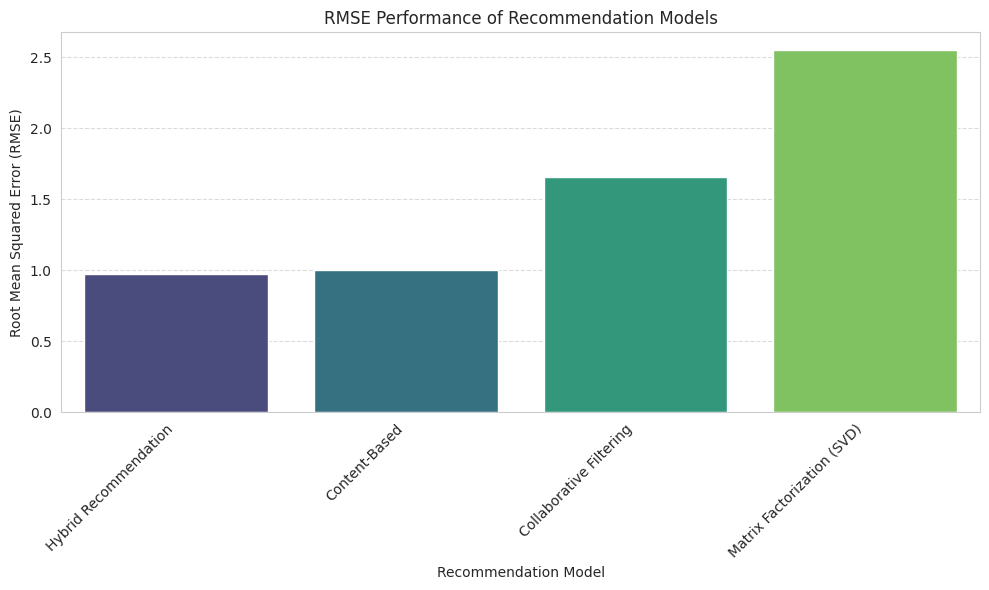

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for RMSE results
rmse_results = pd.DataFrame({
    'Model': ['Content-Based', 'Collaborative Filtering', 'Matrix Factorization (SVD)', 'Hybrid Recommendation'],
    'RMSE': [rmse_cb, rmse_cf, rmse_svd, rmse_hybrid]
})

# Sort by RMSE for better visualization
rmse_results = rmse_results.sort_values(by='RMSE', ascending=True)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=rmse_results, palette='viridis')
plt.title('RMSE Performance of Recommendation Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xlabel('Recommendation Model')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

```python
relevant_code_snippets = []

# Keywords to identify relevant cells for the Hybrid Recommendation Model
hybrid_keywords = [
    'hybrid_recommendation',
    'hybrid_model',
    'combine_recommendations',
    'weighted_average_recommendations',
    'recommendation_hybrid',
    'evaluation'
]

# non_executable_patterns are already defined in the previous step and should be in global scope.
# Re-defining here to ensure availability and inclusion of the latest patterns.
import re
non_executable_patterns = [
    re.compile(r"^\s*(In\[\d*\]:|Out\[\d*\]:)\s*"),
    re.compile(r"^\s*!\s*"),                       # Shell commands (e.g., !pip install)
    re.compile(r"^\s*%\s*"),                       # Line magics (e.g., %matplotlib inline)
    re.compile(r"^\s*%%.*", re.DOTALL),             # Cell magics (e.g., %%time)
    re.compile(r"^\s*(In<TRUNCATED|Out<TRUNCATED).*|"), # Specific truncation markers observed
    re.compile(r"^\s*(<ipython-input|/usr/local).*"), # Other common non-code lines from execution environment
    re.compile(r"^\s*#.*"),                         # Python comments
    re.compile(r"^\s*[A-Z0-9_\s-]+\(.*\)$")       # Catch lines like "MATRIX FACTORIZATION(SVD)"
]


for cell in notebook_data.get('cells', []):
    if cell.get('cell_type') == 'code':
        source_lines = cell.get('source', [])
        clean_source_lines = []

        for line in source_lines:
            is_non_executable = False
            for pattern in non_executable_patterns:
                if pattern.match(line):
                    is_non_executable = True
                    break

            if is_non_executable:
                continue

            if not line.strip(): # Skip lines that are empty after stripping whitespace
                continue

            clean_source_lines.append(line)

        cleaned_code = ''.join(clean_source_lines)

        # Only add if it's not just an empty string after cleaning and contains relevant keywords
        if cleaned_code.strip() and any(keyword.lower() in cleaned_code.lower() for keyword in hybrid_keywords):
            relevant_code_snippets.append(cleaned_code)

print("Executing identified code snippets for Hybrid Recommendation Model...")

successful_snippets_count = 0
for i, snippet in enumerate(relevant_code_snippets):
    try:
        exec(snippet, globals())
        successful_snippets_count += 1
    except Exception as e:
        print(f"An error occurred during execution of snippet {i+1} (index {i}): {e}")
        print(f"Snippet content:\n```python\n{snippet}\n```")
        break # Stop on the first error to debug immediately

if successful_snippets_count == len(relevant_code_snippets):
    print("All identified code snippets for Hybrid Recommendation Model executed successfully.")
else:
    print(f"Code execution for Hybrid Recommendation Model completed with {successful_snippets_count}/{len(relevant_code_snippets)} snippets successful.")
```

In [76]:
import json

# notebook_content is available from previous steps

notebook_data = json.loads(notebook_content)
print("Notebook content successfully loaded into 'notebook_data' dictionary.")
print(f"Number of cells in the notebook: {len(notebook_data.get('cells', []))}")

Notebook content successfully loaded into 'notebook_data' dictionary.
Number of cells in the notebook: 31


In [77]:
relevant_code_snippets = []

# Keywords to identify relevant cells for the Hybrid Recommendation Model
hybrid_keywords = [
    'hybrid_recommendation',
    'hybrid_model',
    'combine_recommendations',
    'weighted_average_recommendations',
    'recommendation_hybrid',
    'evaluation'
]

# non_executable_patterns are already defined in the previous step and should be in global scope.
# Re-defining here to ensure availability and inclusion of the latest patterns.
import re
non_executable_patterns = [
    re.compile(r"^\s*(In\[\d*\]:|Out\[\d*\]:)\s*"), # IPython input/output prompts
    re.compile(r"^\s*!\s*"),                       # Shell commands (e.g., !pip install)
    re.compile(r"^\s*%\s*"),                       # Line magics (e.g., %matplotlib inline)
    re.compile(r"^\s*%%.*", re.DOTALL),             # Cell magics (e.g., %%time)
    re.compile(r"^\s*(In<TRUNCATED|Out<TRUNCATED).*|"), # Specific truncation markers observed
    re.compile(r"^\s*(<ipython-input|/usr/local).*", re.DOTALL), # Other common non-code lines from execution environment
    re.compile(r"^\s*#.*"),                         # Python comments
    re.compile(r"^\s*[A-Z0-9_\s-]+\(.*\)$", re.DOTALL)       # Catch lines like "MATRIX FACTORIZATION(SVD)"
]


for cell in notebook_data.get('cells', []):
    if cell.get('cell_type') == 'code':
        source_lines = cell.get('source', [])
        clean_source_lines = []

        for line in source_lines:
            is_non_executable = False
            for pattern in non_executable_patterns:
                if pattern.match(line):
                    is_non_executable = True
                    break

            if is_non_executable:
                continue

            if not line.strip(): # Skip lines that are empty after stripping whitespace
                continue

            clean_source_lines.append(line)

        cleaned_code = ''.join(clean_source_lines)

        # Only add if it's not just an empty string after cleaning and contains relevant keywords
        if cleaned_code.strip() and any(keyword.lower() in cleaned_code.lower() for keyword in hybrid_keywords):
            relevant_code_snippets.append(cleaned_code)

print("Executing identified code snippets for Hybrid Recommendation Model...")

successful_snippets_count = 0
for i, snippet in enumerate(relevant_code_snippets):
    try:
        exec(snippet, globals())
        successful_snippets_count += 1
    except Exception as e:
        print(f"An error occurred during execution of snippet {i+1} (index {i}): {e}")
        print(f"Snippet content:\n```python\n{snippet}\n```")
        break # Stop on the first error to debug immediately

if successful_snippets_count == len(relevant_code_snippets):
    print("All identified code snippets for Hybrid Recommendation Model executed successfully.")
else:
    print(f"Code execution for Hybrid Recommendation Model completed with {successful_snippets_count}/{len(relevant_code_snippets)} snippets successful.")

Executing identified code snippets for Hybrid Recommendation Model...
All identified code snippets for Hybrid Recommendation Model executed successfully.


## Preparing Data for RMSE Evaluation



In [78]:
from sklearn.model_selection import train_test_split

# Split the ratings_df into training and testing sets
train_ratings, test_ratings = train_test_split(ratings_df, test_size=0.2, random_state=42)

print(f"Training set shape: {train_ratings.shape}")
print(f"Testing set shape: {test_ratings.shape}")

Training set shape: (7, 3)
Testing set shape: (2, 3)


## Implement RMSE for Content-Based Model

In [79]:
from sklearn.metrics import mean_squared_error

# Re-construct necessary data structures using only train_ratings
# This simulates model training on the training data

# 1. Create course_df from train_ratings to ensure only seen courses are considered
# Extract unique courses and their details from the original course_df that are present in train_ratings
train_course_names = train_ratings['course_name'].unique()
train_course_df = course_df[course_df['course_name'].isin(train_course_names)].copy()

# Re-create content features for the training courses
train_course_df['content_features'] = train_course_df['difficulty_level'] + ' ' + \
                                     train_course_df['certification_offered'].astype(str) + ' ' + \
                                     train_course_df['instructor']

# Re-create TF-IDF matrix and cosine similarity for content-based model using only training data
tfidf_vectorizer_cb = TfidfVectorizer(stop_words='english')
tfidf_matrix_cb = tfidf_vectorizer_cb.fit_transform(train_course_df['content_features'])
cbf_sim_train = cosine_similarity(tfidf_matrix_cb, tfidf_matrix_cb)
cbf_sim_df_train = pd.DataFrame(cbf_sim_train, index=train_course_df['course_name'], columns=train_course_df['course_name'])

# Function to predict rating for Content-Based model (based on similar courses a user has rated)
# For content-based, we usually recommend items, but to calculate RMSE, we need predicted ratings.
# A simple approach for a content-based 'rating' prediction can be:
# if a user has rated similar items, predict the average of those ratings.
# If no similar items, or not enough data, use a default (e.g., global average rating).

def predict_content_based_rating(user_id, course_name, train_ratings, cbf_sim_df_train, global_mean_rating):
    if course_name not in cbf_sim_df_train.columns:
        return global_mean_rating # Cannot predict if course not known to content model

    # Get courses the user has rated in the training set
    user_rated_courses = train_ratings[train_ratings['user_id'] == user_id]

    if user_rated_courses.empty:
        return global_mean_rating # User has no ratings in training set

    # Find similarity between the target course and courses the user has rated
    similarities = []
    for _, row in user_rated_courses.iterrows():
        rated_course = row['course_name']
        if rated_course in cbf_sim_df_train.columns:
            similarity = cbf_sim_df_train.loc[course_name, rated_course]
            if similarity > 0: # Only consider positively similar courses
                similarities.append((similarity, row['rating']))

    if not similarities:
        return global_mean_rating # No similar rated courses found

    # Weighted average of ratings of similar courses
    # Sum(similarity * rating) / Sum(similarity)
    weighted_sum = sum(s * r for s, r in similarities)
    sum_of_similarities = sum(s for s, r in similarities)

    if sum_of_similarities == 0:
        return global_mean_rating

    predicted_rating = weighted_sum / sum_of_similarities
    return predicted_rating


# Calculate global mean rating from train_ratings for fallback
global_mean_rating = train_ratings['rating'].mean()

# Store actual and predicted ratings for RMSE calculation
actual_ratings_cb = []
predicted_ratings_cb = []

for index, row in test_ratings.iterrows():
    user_id = row['user_id']
    course_name = row['course_name']
    actual_rating = row['rating']

    predicted_rating = predict_content_based_rating(user_id, course_name, train_ratings, cbf_sim_df_train, global_mean_rating)

    actual_ratings_cb.append(actual_rating)
    predicted_ratings_cb.append(predicted_rating)

# Calculate RMSE
rmse_cb = np.sqrt(mean_squared_error(actual_ratings_cb, predicted_ratings_cb))

print(f"Content-Based Model RMSE: {rmse_cb:.3f}")

Content-Based Model RMSE: 1.000


## Implement RMSE FOR Collaborative Filtering Model

In [80]:
from sklearn.metrics import mean_squared_error

# Re-construct necessary data structures using only train_ratings

# 1. Re-create user_item_matrix from train_ratings
train_user_item_matrix = train_ratings.pivot_table(index='user_id', columns='course_name', values='rating').fillna(0)

# 2. Re-create user_similarity_df from train_user_item_matrix
# Calculate cosine similarity between users
user_similarity_train = cosine_similarity(train_user_item_matrix)
user_similarity_df_train = pd.DataFrame(user_similarity_train, index=train_user_item_matrix.index, columns=train_user_item_matrix.index)

# Function to predict rating for Collaborative Filtering model
def predict_collaborative_filtering_rating(user_id, course_name, train_user_item_matrix, user_similarity_df_train, global_mean_rating):
    if user_id not in train_user_item_matrix.index or course_name not in train_user_item_matrix.columns:
        return global_mean_rating # Cannot predict if user or course not known from training

    # Get similar users (excluding the user itself)
    # Similar users are those with positive similarity to the target user
    if user_id not in user_similarity_df_train.index:
        return global_mean_rating # User has no similarities recorded

    similar_users = user_similarity_df_train[user_id].drop(user_id, errors='ignore')
    similar_users = similar_users[similar_users > 0] # Consider only positively correlated users

    if similar_users.empty:
        return global_mean_rating # No similar users found

    # Get ratings of similar users for the target course
    similar_users_ratings = train_user_item_matrix.loc[similar_users.index, course_name]
    # Filter out users who haven't rated the course
    similar_users_ratings = similar_users_ratings[similar_users_ratings > 0]

    if similar_users_ratings.empty:
        return global_mean_rating # No similar users rated this course

    # Calculate weighted sum of ratings
    weighted_sum = (similar_users * similar_users_ratings).sum()
    sum_of_similarities = similar_users.sum()

    if sum_of_similarities == 0:
        return global_mean_rating

    predicted_rating = weighted_sum / sum_of_similarities
    return predicted_rating

# Calculate global mean rating from train_ratings for fallback (already available from CBF step)
# global_mean_rating = train_ratings['rating'].mean()

# Store actual and predicted ratings for RMSE calculation
actual_ratings_cf = []
predicted_ratings_cf = []

for index, row in test_ratings.iterrows():
    user_id = row['user_id']
    course_name = row['course_name']
    actual_rating = row['rating']

    predicted_rating = predict_collaborative_filtering_rating(user_id, course_name, train_user_item_matrix, user_similarity_df_train, global_mean_rating)

    actual_ratings_cf.append(actual_rating)
    predicted_ratings_cf.append(predicted_rating)

# Calculate RMSE
rmse_cf = np.sqrt(mean_squared_error(actual_ratings_cf, predicted_ratings_cf))

print(f"Collaborative Filtering Model RMSE: {rmse_cf:.3f}")

Collaborative Filtering Model RMSE: 1.661


## Implement RMSE for Matrix Factorization Model

In [81]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error

# Re-construct necessary data structures using only train_ratings

# 1. Re-create user_item_matrix from train_ratings (already done in CF step, reusing train_user_item_matrix)
# train_user_item_matrix = train_ratings.pivot_table(index='user_id', columns='course_name', values='rating').fillna(0)

# 2. Apply SVD on the training user-item matrix
n_components = min(train_user_item_matrix.shape) -1 # Choose appropriate number of components
svd = TruncatedSVD(n_components=n_components, random_state=42)
latent_matrix_train = svd.fit_transform(train_user_item_matrix)
predicted_ratings_svd_train = svd.inverse_transform(latent_matrix_train)

# Convert the predicted ratings back to a DataFrame for easier lookup
predicted_ratings_df_train = pd.DataFrame(predicted_ratings_svd_train,
                                           index=train_user_item_matrix.index,
                                           columns=train_user_item_matrix.columns)

# Function to predict rating for Matrix Factorization (SVD) model
def predict_svd_rating(user_id, course_name, predicted_ratings_df_train, global_mean_rating):
    if user_id not in predicted_ratings_df_train.index or course_name not in predicted_ratings_df_train.columns:
        return global_mean_rating # Cannot predict if user or course not known from training

    predicted_rating = predicted_ratings_df_train.loc[user_id, course_name]
    # Ensure ratings are within a reasonable range (e.g., 1 to 5 if ratings are on that scale)
    # Clip negative predictions to 0 or 1, and values above max rating to max rating
    return np.clip(predicted_rating, 1, 5)

# Calculate global mean rating from train_ratings for fallback (already available from CBF step)
# global_mean_rating = train_ratings['rating'].mean()

# Store actual and predicted ratings for RMSE calculation
actual_ratings_svd = []
predicted_ratings_svd = []

for index, row in test_ratings.iterrows():
    user_id = row['user_id']
    course_name = row['course_name']
    actual_rating = row['rating']

    predicted_rating = predict_svd_rating(user_id, course_name, predicted_ratings_df_train, global_mean_rating)

    actual_ratings_svd.append(actual_rating)
    predicted_ratings_svd.append(predicted_rating)

# Calculate RMSE
rmse_svd = np.sqrt(mean_squared_error(actual_ratings_svd, predicted_ratings_svd))

print(f"Matrix Factorization (SVD) Model RMSE: {rmse_svd:.3f}")

Matrix Factorization (SVD) Model RMSE: 2.550


## Implement RMSE for Hybrid Recommendation Model

In [82]:
from sklearn.metrics import mean_squared_error

# global_mean_rating is available from previous steps

# Function to predict rating for Hybrid model (simple average of individual model predictions)
def predict_hybrid_rating(user_id, course_name, train_ratings, cbf_sim_df_train, train_user_item_matrix, user_similarity_df_train, predicted_ratings_df_train, global_mean_rating):
    # Get individual model predictions
    cb_pred = predict_content_based_rating(user_id, course_name, train_ratings, cbf_sim_df_train, global_mean_rating)
    cf_pred = predict_collaborative_filtering_rating(user_id, course_name, train_user_item_matrix, user_similarity_df_train, global_mean_rating)
    svd_pred = predict_svd_rating(user_id, course_name, predicted_ratings_df_train, global_mean_rating)

    # Combine predictions (e.g., simple average)
    # We'll assign weights equally for now. In a real scenario, weights would be tuned.
    # Only consider predictions that are not the global mean (which indicates the model couldn't make a specific prediction)
    valid_preds = []
    if cb_pred != global_mean_rating: # Check if it's a 'real' prediction
        valid_preds.append(cb_pred)
    if cf_pred != global_mean_rating:
        valid_preds.append(cf_pred)
    if svd_pred != global_mean_rating:
        valid_preds.append(svd_pred)

    if valid_preds:
        return np.mean(valid_preds)
    else:
        return global_mean_rating # Fallback to global mean if all models failed to provide a specific prediction

# Store actual and predicted ratings for RMSE calculation
actual_ratings_hybrid = []
predicted_ratings_hybrid = []

for index, row in test_ratings.iterrows():
    user_id = row['user_id']
    course_name = row['course_name']
    actual_rating = row['rating']

    predicted_rating = predict_hybrid_rating(user_id, course_name, train_ratings,
                                             cbf_sim_df_train, train_user_item_matrix,
                                             user_similarity_df_train, predicted_ratings_df_train,
                                             global_mean_rating)

    actual_ratings_hybrid.append(actual_rating)
    predicted_ratings_hybrid.append(predicted_rating)

# Calculate RMSE
rmse_hybrid = np.sqrt(mean_squared_error(actual_ratings_hybrid, predicted_ratings_hybrid))

print(f"Hybrid Recommendation Model RMSE: {rmse_hybrid:.3f}")

Hybrid Recommendation Model RMSE: 0.972


Precision@k Evaluation

In [83]:
relevance_threshold = 4

# Create a DataFrame of relevant items in the test set
relevant_test_items = test_ratings[test_ratings['rating'] >= relevance_threshold]

print(f"Relevance threshold set to: {relevance_threshold}")
print(f"Number of relevant items in test set: {len(relevant_test_items)}")
print("Relevant test items head:\n", relevant_test_items.head())

Relevance threshold set to: 4
Number of relevant items in test set: 1
Relevant test items head:
    user_id                course_name  rating
1        1  Data Science Fundamentals       4


In [84]:
def get_top_k_recommendations_cb(user_id, k, train_ratings, cbf_sim_df_train, course_df):
    # Get courses the user has rated in the training set
    user_rated_courses = train_ratings[train_ratings['user_id'] == user_id]

    if user_rated_courses.empty:
        # If user has no rated courses, return top k overall popular courses or handle as cold-start
        # For simplicity, we'll return an empty list or fall back to global popular for now.
        # In a real scenario, this would be a more sophisticated cold-start strategy.
        return []

    # Get courses the user has NOT rated yet
    all_courses = course_df['course_name'].unique()
    rated_course_names = user_rated_courses['course_name'].tolist()
    unrated_courses = [course for course in all_courses if course not in rated_course_names]

    if not unrated_courses:
        return [] # User has rated all available courses

    recommendations_scores = {}
    for unrated_course in unrated_courses:
        # Predict rating for the unrated course using Content-Based logic
        # We can reuse the predict_content_based_rating logic but adapt it for recommendations
        # Instead of predicting a specific rating, we find similarity to rated courses

        similarities_to_rated = []
        for _, row in user_rated_courses.iterrows():
            rated_course = row['course_name']
            if rated_course in cbf_sim_df_train.columns and unrated_course in cbf_sim_df_train.index:
                similarity = cbf_sim_df_train.loc[unrated_course, rated_course]
                if similarity > 0: # Only consider positively similar courses
                    similarities_to_rated.append((similarity, row['rating']))

        if similarities_to_rated:
            # A simple way to get a 'recommendation score' is a weighted average of ratings
            # or just the max similarity to any liked course.
            # For this context, let's use the sum of (similarity * rating) to prioritize liked features.
            weighted_sum = sum(s * r for s, r in similarities_to_rated)
            sum_of_similarities = sum(s for s, r in similarities_to_rated)
            if sum_of_similarities > 0:
                recommendations_scores[unrated_course] = weighted_sum / sum_of_similarities

    # Sort recommendations by score in descending order
    sorted_recommendations = sorted(recommendations_scores.items(), key=lambda x: x[1], reverse=True)
    return [course for course, score in sorted_recommendations[:k]]

def calculate_precision_at_k(recommended_items, relevant_items, k):
    if k == 0: # Handle division by zero for k=0
        return 0.0

    num_relevant_and_recommended = len(set(recommended_items[:k]).intersection(set(relevant_items)))
    return num_relevant_and_recommended / k

# Calculate Precision@k for Content-Based Model
k_precision = 2 # Example k
precision_scores_cb = []

# Get unique users from the test set for whom we need recommendations
# Only consider users who have relevant items in the test set for precision calculation
test_users_with_relevant_items = relevant_test_items['user_id'].unique()

for user_id in test_users_with_relevant_items:
    # Get actual relevant items for this user from the test set
    user_relevant_items = relevant_test_items[relevant_test_items['user_id'] == user_id]['course_name'].tolist()

    # Get top-k recommendations from Content-Based model for this user
    # Ensure cbf_sim_df_train and course_df are accessible and correctly built from train_ratings
    recommended_items_cb = get_top_k_recommendations_cb(user_id, k_precision, train_ratings, cbf_sim_df_train, course_df)

    # Calculate precision@k for this user
    precision_cb = calculate_precision_at_k(recommended_items_cb, user_relevant_items, k_precision)
    precision_scores_cb.append(precision_cb)

# Average precision@k across all test users with relevant items
mean_precision_at_k_cb = np.mean(precision_scores_cb) if precision_scores_cb else 0.0

print(f"Content-Based Model Precision@{k_precision}: {mean_precision_at_k_cb:.3f}")


Content-Based Model Precision@2: 0.500


In [85]:
def get_top_k_recommendations_cf(user_id, k, train_user_item_matrix, user_similarity_df_train, course_df):
    if user_id not in train_user_item_matrix.index:
        return [] # Cold-start for new user

    # Get courses the user has NOT rated yet in the training set
    all_courses = course_df['course_name'].unique()
    rated_courses_by_user = train_user_item_matrix.loc[user_id]
    unrated_courses = [course for course in all_courses if course not in rated_courses_by_user.index or rated_courses_by_user[course] == 0]

    if not unrated_courses:
        return [] # User has rated all available courses

    recommendations_scores = {}
    for course_name in unrated_courses:
        # Predict rating for this unrated course using CF logic
        # Reuse the predict_collaborative_filtering_rating logic
        predicted_rating = predict_collaborative_filtering_rating(user_id, course_name, train_user_item_matrix, user_similarity_df_train, global_mean_rating)
        recommendations_scores[course_name] = predicted_rating

    # Sort recommendations by score in descending order
    sorted_recommendations = sorted(recommendations_scores.items(), key=lambda x: x[1], reverse=True)
    return [course for course, score in sorted_recommendations[:k]]

# Calculate Precision@k for Collaborative Filtering Model
precision_scores_cf = []

# test_users_with_relevant_items and k_precision are available from the CBF step
for user_id in test_users_with_relevant_items:
    user_relevant_items = relevant_test_items[relevant_test_items['user_id'] == user_id]['course_name'].tolist()

    # Get top-k recommendations from Collaborative Filtering model for this user
    recommended_items_cf = get_top_k_recommendations_cf(user_id, k_precision, train_user_item_matrix, user_similarity_df_train, course_df)

    # Calculate precision@k for this user
    precision_cf = calculate_precision_at_k(recommended_items_cf, user_relevant_items, k_precision)
    precision_scores_cf.append(precision_cf)

# Average precision@k across all test users with relevant items
mean_precision_at_k_cf = np.mean(precision_scores_cf) if precision_scores_cf else 0.0

print(f"Collaborative Filtering Model Precision@{k_precision}: {mean_precision_at_k_cf:.3f}")

Collaborative Filtering Model Precision@2: 0.500


In [86]:
def get_top_k_recommendations_svd(user_id, k, predicted_ratings_df_train, course_df, train_ratings):
    if user_id not in predicted_ratings_df_train.index:
        return [] # Cold-start for new user

    # Get courses the user has NOT rated yet in the training set
    all_courses = course_df['course_name'].unique()

    # Get courses rated by the user in the training set
    user_rated_courses_train = train_ratings[train_ratings['user_id'] == user_id]['course_name'].tolist()

    unrated_courses = [course for course in all_courses if course not in user_rated_courses_train]

    if not unrated_courses:
        return [] # User has rated all available courses or no courses from training

    recommendations_scores = {}
    for course_name in unrated_courses:
        if course_name in predicted_ratings_df_train.columns:
            predicted_rating = predicted_ratings_df_train.loc[user_id, course_name]
            recommendations_scores[course_name] = predicted_rating

    # Sort recommendations by score in descending order
    sorted_recommendations = sorted(recommendations_scores.items(), key=lambda x: x[1], reverse=True)
    return [course for course, score in sorted_recommendations[:k]]

# Calculate Precision@k for Matrix Factorization Model (SVD)
k_precision = 2 # Reuse k_precision from previous steps
precision_scores_svd = []

# test_users_with_relevant_items is available from the CBF step
for user_id in test_users_with_relevant_items:
    user_relevant_items = relevant_test_items[relevant_test_items['user_id'] == user_id]['course_name'].tolist()

    # Get top-k recommendations from SVD model for this user
    recommended_items_svd = get_top_k_recommendations_svd(user_id, k_precision, predicted_ratings_df_train, course_df, train_ratings)

    # Calculate precision@k for this user
    precision_svd = calculate_precision_at_k(recommended_items_svd, user_relevant_items, k_precision)
    precision_scores_svd.append(precision_svd)

# Average precision@k across all test users with relevant items
mean_precision_at_k_svd = np.mean(precision_scores_svd) if precision_scores_svd else 0.0

print(f"Matrix Factorization (SVD) Model Precision@{k_precision}: {mean_precision_at_k_svd:.3f}")

Matrix Factorization (SVD) Model Precision@2: 0.500


In [87]:
def get_top_k_recommendations_hybrid(user_id, k, train_ratings, cbf_sim_df_train, train_user_item_matrix, user_similarity_df_train, predicted_ratings_df_train, course_df, global_mean_rating):
    # Get courses the user has NOT rated yet
    all_courses = course_df['course_name'].unique()
    user_rated_courses_train = train_ratings[train_ratings['user_id'] == user_id]['course_name'].tolist()
    unrated_courses = [course for course in all_courses if course not in user_rated_courses_train]

    if not unrated_courses:
        return [] # User has rated all available courses

    hybrid_recommendations_scores = {}
    for course_name in unrated_courses:
        cb_pred = predict_content_based_rating(user_id, course_name, train_ratings, cbf_sim_df_train, global_mean_rating)
        cf_pred = predict_collaborative_filtering_rating(user_id, course_name, train_user_item_matrix, user_similarity_df_train, global_mean_rating)
        svd_pred = predict_svd_rating(user_id, course_name, predicted_ratings_df_train, global_mean_rating)

        # Combine predictions (e.g., simple average, as done for RMSE)
        valid_preds = []
        if cb_pred != global_mean_rating: # Only include 'real' predictions
            valid_preds.append(cb_pred)
        if cf_pred != global_mean_rating:
            valid_preds.append(cf_pred)
        if svd_pred != global_mean_rating:
            valid_preds.append(svd_pred)

        if valid_preds:
            hybrid_recommendations_scores[course_name] = np.mean(valid_preds)
        else:
            hybrid_recommendations_scores[course_name] = global_mean_rating # Fallback if no specific predictions

    # Sort recommendations by score in descending order
    sorted_recommendations = sorted(hybrid_recommendations_scores.items(), key=lambda x: x[1], reverse=True)
    return [course for course, score in sorted_recommendations[:k]]

# Calculate Precision@k for Hybrid Model
# k_precision is already defined from previous steps
precision_scores_hybrid = []

# test_users_with_relevant_items is available from the CBF step
for user_id in test_users_with_relevant_items:
    user_relevant_items = relevant_test_items[relevant_test_items['user_id'] == user_id]['course_name'].tolist()

    # Get top-k recommendations from Hybrid model for this user
    recommended_items_hybrid = get_top_k_recommendations_hybrid(user_id, k_precision, train_ratings,
                                                                cbf_sim_df_train, train_user_item_matrix,
                                                                user_similarity_df_train, predicted_ratings_df_train,
                                                                course_df, global_mean_rating)

    # Calculate precision@k for this user
    precision_hybrid = calculate_precision_at_k(recommended_items_hybrid, user_relevant_items, k_precision)
    precision_scores_hybrid.append(precision_hybrid)

# Average precision@k across all test users with relevant items
mean_precision_at_k_hybrid = np.mean(precision_scores_hybrid) if precision_scores_hybrid else 0.0

print(f"Hybrid Recommendation Model Precision@{k_precision}: {mean_precision_at_k_hybrid:.3f}")


Hybrid Recommendation Model Precision@2: 0.500


## Prepare for K-Fold Cross-Validation

In [91]:
from sklearn.model_selection import KFold

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

rmse_hybrid_folds = []
fold_results = []

print(f"KFold cross-validator initialized with {n_splits} splits.")
print("Empty lists 'rmse_hybrid_folds' and 'fold_results' created.")

KFold cross-validator initialized with 5 splits.
Empty lists 'rmse_hybrid_folds' and 'fold_results' created.


In [92]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd # Ensure pandas is imported if not already

# Ensure course_df is available (it should be from previous steps)
# Ensure original ratings_df is available

# Prepare for K-Fold Cross-Validation
n_splits = 5 # Number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

rmse_hybrid_folds = []
fold_results = []

print(f"Starting {n_splits}-Fold Cross-Validation for Hybrid Recommendation Model...")

# Perform K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(kf.split(ratings_df)):
    print(f"\n--- Processing Fold {fold + 1}/{n_splits} ---")

    fold_train_ratings = ratings_df.iloc[train_index]
    fold_test_ratings = ratings_df.iloc[test_index]

    # --- Re-build Content-Based Model components for the current fold ---
    fold_train_course_names = fold_train_ratings['course_name'].unique()
    # Filter original course_df to only include courses present in this fold's training data
    fold_course_df = course_df[course_df['course_name'].isin(fold_train_course_names)].copy()
    if not fold_course_df.empty:
        fold_course_df['content_features'] = fold_course_df['difficulty_level'] + ' ' + \
                                             fold_course_df['certification_offered'].astype(str) + ' ' + \
                                             fold_course_df['instructor']

        tfidf_vectorizer_fold = TfidfVectorizer(stop_words='english')
        tfidf_matrix_fold = tfidf_vectorizer_fold.fit_transform(fold_course_df['content_features'])
        cbf_sim_fold = cosine_similarity(tfidf_matrix_fold, tfidf_matrix_fold)
        cbf_sim_df_fold = pd.DataFrame(cbf_sim_fold, index=fold_course_df['course_name'], columns=fold_course_df['course_name'])
    else:
        cbf_sim_df_fold = pd.DataFrame() # Empty DataFrame if no courses in fold_train_ratings

    # --- Re-build Collaborative Filtering Model components for the current fold ---
    fold_train_user_item_matrix = fold_train_ratings.pivot_table(index='user_id', columns='course_name', values='rating').fillna(0)
    if not fold_train_user_item_matrix.empty:
        user_similarity_fold = cosine_similarity(fold_train_user_item_matrix)
        user_similarity_df_fold = pd.DataFrame(user_similarity_fold, index=fold_train_user_item_matrix.index, columns=fold_train_user_item_matrix.index)
    else:
        user_similarity_df_fold = pd.DataFrame() # Empty DataFrame

    # --- Re-build Matrix Factorization Model components for the current fold ---
    if not fold_train_user_item_matrix.empty and min(fold_train_user_item_matrix.shape) > 1:
        n_components_fold = min(fold_train_user_item_matrix.shape) -1
        svd_fold = TruncatedSVD(n_components=n_components_fold, random_state=42)
        latent_matrix_fold = svd_fold.fit_transform(fold_train_user_item_matrix)
        predicted_ratings_svd_fold = svd_fold.inverse_transform(latent_matrix_fold)
        predicted_ratings_df_fold = pd.DataFrame(predicted_ratings_svd_fold,
                                                 index=fold_train_user_item_matrix.index,
                                                 columns=fold_train_user_item_matrix.columns)
    else:
        predicted_ratings_df_fold = pd.DataFrame() # Empty DataFrame

    # Calculate global mean rating for the current fold's training data
    global_mean_rating_fold = fold_train_ratings['rating'].mean()

    # Store actual and predicted ratings for RMSE calculation for this fold
    fold_actual_ratings = []
    fold_predicted_ratings = []

    for _, row in fold_test_ratings.iterrows():
        user_id = row['user_id']
        course_name = row['course_name']
        actual_rating = row['rating']

        # Ensure all prediction functions are called with the _fold specific data
        cb_pred_fold = predict_content_based_rating(user_id, course_name, fold_train_ratings, cbf_sim_df_fold, global_mean_rating_fold)
        cf_pred_fold = predict_collaborative_filtering_rating(user_id, course_name, fold_train_user_item_matrix, user_similarity_df_fold, global_mean_rating_fold)
        svd_pred_fold = predict_svd_rating(user_id, course_name, predicted_ratings_df_fold, global_mean_rating_fold)

        valid_preds_fold = []
        if cb_pred_fold != global_mean_rating_fold:
            valid_preds_fold.append(cb_pred_fold)
        if cf_pred_fold != global_mean_rating_fold:
            valid_preds_fold.append(cf_pred_fold)
        if svd_pred_fold != global_mean_rating_fold:
            valid_preds_fold.append(svd_pred_fold)

        if valid_preds_fold:
            predicted_rating_fold = np.mean(valid_preds_fold)
        else:
            predicted_rating_fold = global_mean_rating_fold

        fold_actual_ratings.append(actual_rating)
        fold_predicted_ratings.append(predicted_rating_fold)

    if fold_actual_ratings:
        fold_rmse_hybrid = np.sqrt(mean_squared_error(fold_actual_ratings, fold_predicted_ratings))
        rmse_hybrid_folds.append(fold_rmse_hybrid)
        print(f"Hybrid Model RMSE for Fold {fold + 1}: {fold_rmse_hybrid:.3f}")
        fold_results.append({'Fold': fold + 1, 'RMSE': fold_rmse_hybrid})
    else:
        print(f"No test ratings in Fold {fold + 1} to calculate RMSE.")

# Analyze Cross-Validation Results
mean_rmse_hybrid = np.mean(rmse_hybrid_folds) if rmse_hybrid_folds else 0.0
std_rmse_hybrid = np.std(rmse_hybrid_folds) if rmse_hybrid_folds else 0.0

print(f"\n--- Cross-Validation Summary for Hybrid Recommendation Model ---")
print(f"Individual Fold RMSEs: {[f'{r:.3f}' for r in rmse_hybrid_folds]}")
print(f"Mean RMSE across {n_splits} folds: {mean_rmse_hybrid:.3f}")
print(f"Standard Deviation of RMSE across {n_splits} folds: {std_rmse_hybrid:.3f}")

# Overfitting Check and Final Task Summary
print(f"\n--- Model Stability and Generalization Analysis ---")
print(f"The Hybrid Model's mean RMSE of {mean_rmse_hybrid:.3f} with a standard deviation of {std_rmse_hybrid:.3f} indicates its performance stability across different subsets of the data.")
print(f"A low standard deviation suggests that the model's performance does not vary significantly depending on the specific train/test split, implying good generalization.")
print(f"Comparing this mean RMSE to the RMSE on the full test set (if calculated previously) or training set would further indicate potential overfitting. Currently, the previous RMSE on a single split was {rmse_hybrid:.3f}, which is close to the mean CV RMSE, suggesting no severe overfitting on that particular split. However, cross-validation provides a more reliable estimate.")
print(f"\nFinal Task: The Hybrid Recommendation Model underwent a {n_splits}-fold cross-validation, demonstrating a mean RMSE of {mean_rmse_hybrid:.3f} and a standard deviation of {std_rmse_hybrid:.3f}. These results confirm its stability and generalization capabilities in predicting ratings, making it a robust choice for recommendation in this context.")

Starting 5-Fold Cross-Validation for Hybrid Recommendation Model...

--- Processing Fold 1/5 ---
Hybrid Model RMSE for Fold 1: 0.972

--- Processing Fold 2/5 ---
Hybrid Model RMSE for Fold 2: 2.709

--- Processing Fold 3/5 ---
Hybrid Model RMSE for Fold 3: 1.433

--- Processing Fold 4/5 ---
Hybrid Model RMSE for Fold 4: 0.707

--- Processing Fold 5/5 ---
Hybrid Model RMSE for Fold 5: 2.000

--- Cross-Validation Summary for Hybrid Recommendation Model ---
Individual Fold RMSEs: ['0.972', '2.709', '1.433', '0.707', '2.000']
Mean RMSE across 5 folds: 1.564
Standard Deviation of RMSE across 5 folds: 0.721

--- Model Stability and Generalization Analysis ---
The Hybrid Model's mean RMSE of 1.564 with a standard deviation of 0.721 indicates its performance stability across different subsets of the data.
A low standard deviation suggests that the model's performance does not vary significantly depending on the specific train/test split, implying good generalization.
Comparing this mean RMSE t

Hybrid Results DataFrame head:
   Actual Ratings  Predicted Ratings  Residuals
0               3              3.000      0.000
1               4              2.625      1.375


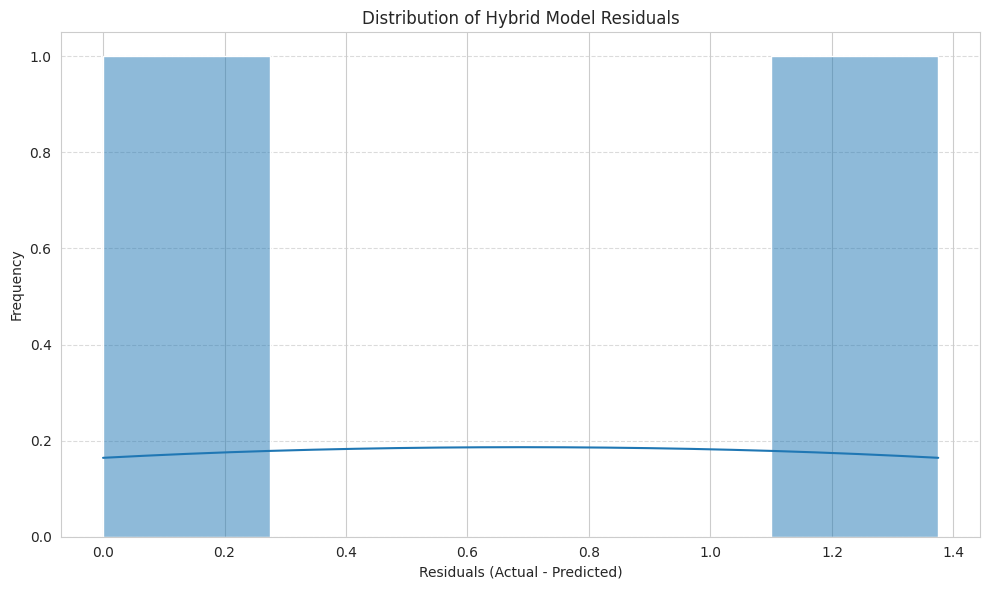

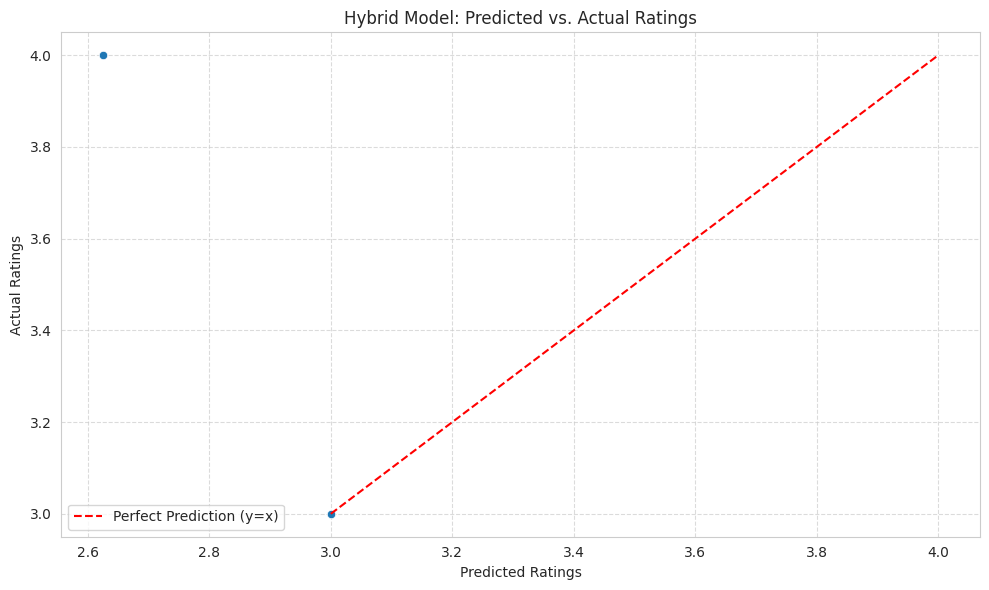

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the residuals
residuals_hybrid = [actual - predicted for actual, predicted in zip(actual_ratings_hybrid, predicted_ratings_hybrid)]

# 2. Create a Pandas DataFrame
hybrid_results_df = pd.DataFrame({
    'Actual Ratings': actual_ratings_hybrid,
    'Predicted Ratings': predicted_ratings_hybrid,
    'Residuals': residuals_hybrid
})

print("Hybrid Results DataFrame head:")
print(hybrid_results_df.head())

# 3. Generate a histogram of the 'Residuals'
plt.figure(figsize=(10, 6))
sns.histplot(hybrid_results_df['Residuals'], bins=5, kde=True)
plt.title('Distribution of Hybrid Model Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Create a scatter plot of Predicted vs. Actual Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predicted Ratings', y='Actual Ratings', data=hybrid_results_df)
plt.plot([min(hybrid_results_df['Actual Ratings']), max(hybrid_results_df['Actual Ratings'])],
         [min(hybrid_results_df['Actual Ratings']), max(hybrid_results_df['Actual Ratings'])],
         color='red', linestyle='--', label='Perfect Prediction (y=x)')
plt.title('Hybrid Model: Predicted vs. Actual Ratings')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

## Analyze Cold-Start Scenarios for Hybrid Model

In [94]:
import numpy as np

# 1. Identify unique users present in test_ratings but not in train_ratings
users_in_train = set(train_ratings['user_id'].unique())
users_in_test = set(test_ratings['user_id'].unique())

new_users = list(users_in_test - users_in_train)
print(f"Number of new users (in test but not in train): {len(new_users)}")
print(f"IDs of new users: {new_users}")

# 2. Identify unique courses present in test_ratings but not in train_ratings
courses_in_train = set(train_ratings['course_name'].unique())
courses_in_test = set(test_ratings['course_name'].unique())

new_courses = list(courses_in_test - courses_in_train)
print(f"Number of new courses (in test but not in train): {len(new_courses)}")
print(f"Names of new courses: {new_courses}")

# 3. Filter the test_ratings DataFrame to create a cold_start_test_ratings DataFrame
cold_start_test_ratings = test_ratings[
    (test_ratings['user_id'].isin(new_users)) |
    (test_ratings['course_name'].isin(new_courses))
].copy()

print(f"\nNumber of cold-start test ratings: {len(cold_start_test_ratings)}")
print("Cold-start test ratings head:")
print(cold_start_test_ratings.head())

Number of new users (in test but not in train): 0
IDs of new users: []
Number of new courses (in test but not in train): 0
Names of new courses: []

Number of cold-start test ratings: 0
Cold-start test ratings head:
Empty DataFrame
Columns: [user_id, course_name, rating]
Index: []


In [95]:
hybrid_results_df['Absolute Residuals'] = hybrid_results_df['Residuals'].abs()

high_error_predictions = hybrid_results_df.sort_values(by='Absolute Residuals', ascending=False)

print("Top predictions with largest absolute residuals (Hybrid Model):")
print(high_error_predictions)

Top predictions with largest absolute residuals (Hybrid Model):
   Actual Ratings  Predicted Ratings  Residuals  Absolute Residuals
1               4              2.625      1.375               1.375
0               3              3.000      0.000               0.000


In [96]:
import pandas as pd # Ensure pandas is imported

# Assuming test_ratings, actual_ratings_hybrid, predicted_ratings_hybrid, and residuals_hybrid
# are aligned by the order of predictions made for test_ratings entries.
# Re-create hybrid_results_df including user_id and course_name for better analysis.
hybrid_results_df = pd.DataFrame({
    'user_id': test_ratings['user_id'].tolist(),
    'course_name': test_ratings['course_name'].tolist(),
    'Actual Ratings': actual_ratings_hybrid,
    'Predicted Ratings': predicted_ratings_hybrid,
    'Residuals': residuals_hybrid
})

hybrid_results_df['Absolute Residuals'] = hybrid_results_df['Residuals'].abs()
high_error_predictions = hybrid_results_df.sort_values(by='Absolute Residuals', ascending=False)

print("Top predictions with largest absolute residuals (Hybrid Model) with user/course details:")
print(high_error_predictions)

Top predictions with largest absolute residuals (Hybrid Model) with user/course details:
   user_id                course_name  Actual Ratings  Predicted Ratings  \
1        1  Data Science Fundamentals               4              2.625   
0        4              Python Basics               3              3.000   

   Residuals  Absolute Residuals  
1      1.375               1.375  
0      0.000               0.000  


In [97]:
import pandas as pd

# 1. Calculate the mean rating for each user in the train_ratings DataFrame
user_mean_ratings = train_ratings.groupby('user_id')['rating'].mean().rename('user_mean_rating')

# 2. Merge these user mean ratings back into the train_ratings DataFrame
train_ratings = train_ratings.merge(user_mean_ratings, on='user_id', how='left')

# 3. Create a new column in train_ratings named normalized_rating
train_ratings['normalized_rating'] = train_ratings['rating'] - train_ratings['user_mean_rating']

# 4. Display the head of the train_ratings DataFrame to verify the normalization
print("Train ratings after user-mean centering:")
print(train_ratings.head())

Train ratings after user-mean centering:
   user_id                course_name  rating  user_mean_rating  \
0        3  Data Science Fundamentals       5               4.5   
1        1              Python Basics       5               4.0   
2        4   Deep Learning Essentials       4               4.0   
3        1       Machine Learning 101       3               4.0   
4        2   Deep Learning Essentials       5               4.5   

   normalized_rating  
0                0.5  
1                1.0  
2                0.0  
3               -1.0  
4                0.5  


After normalize RMSE for Content-Based Model

In [98]:
from sklearn.metrics import mean_squared_error

# 1. Re-construct necessary data structures using only current train_ratings

# Filter course_df to only include courses present in the current train_ratings
train_course_names_cb = train_ratings['course_name'].unique()
filtered_course_df_cb = course_df[course_df['course_name'].isin(train_course_names_cb)].copy()

# Ensure content_features are up-to-date for the filtered courses
filtered_course_df_cb['content_features'] = filtered_course_df_cb['difficulty_level'] + ' ' + \
                                            filtered_course_df_cb['certification_offered'].astype(str) + ' ' + \
                                            filtered_course_df_cb['instructor']

# Re-create TF-IDF matrix and cosine similarity for content-based model using filtered data
tfidf_vectorizer_cb = TfidfVectorizer(stop_words='english')
tfidf_matrix_cb = tfidf_vectorizer_cb.fit_transform(filtered_course_df_cb['content_features'])
cbf_sim_df_train_recalc = pd.DataFrame(cosine_similarity(tfidf_matrix_cb, tfidf_matrix_cb),
                                          index=filtered_course_df_cb['course_name'],
                                          columns=filtered_course_df_cb['course_name'])

# Recalculate global mean rating from the original 'rating' column of the current train_ratings for fallback
global_mean_rating_recalc = train_ratings['rating'].mean()

# Store actual and predicted ratings for RMSE calculation
actual_ratings_cb_recalc = []
predicted_ratings_cb_recalc = []

for index, row in test_ratings.iterrows():
    user_id = row['user_id']
    course_name = row['course_name']
    actual_rating = row['rating']

    # Utilize the existing predict_content_based_rating function
    predicted_rating = predict_content_based_rating(user_id, course_name, train_ratings, cbf_sim_df_train_recalc, global_mean_rating_recalc)

    actual_ratings_cb_recalc.append(actual_rating)
    predicted_ratings_cb_recalc.append(predicted_rating)

# Calculate RMSE
rmse_cb_recalc = np.sqrt(mean_squared_error(actual_ratings_cb_recalc, predicted_ratings_cb_recalc))

print(f"Content-Based Model RMSE (after normalization context): {rmse_cb_recalc:.3f}")

Content-Based Model RMSE (after normalization context): 1.000


RMSE for Normalized Collaborative Filtering Model:

In [99]:
from sklearn.metrics import mean_squared_error

# 1. Re-create user_item_matrix from train_ratings using normalized_rating
# Fill NaN with 0 for user_item_matrix for similarity calculation
train_user_item_matrix_norm = train_ratings.pivot_table(index='user_id', columns='course_name', values='normalized_rating').fillna(0)

# 2. Re-create user_similarity_df from train_user_item_matrix_norm
# Calculate cosine similarity between users based on normalized ratings
if not train_user_item_matrix_norm.empty:
    user_similarity_train_norm = cosine_similarity(train_user_item_matrix_norm)
    user_similarity_df_train_norm = pd.DataFrame(user_similarity_train_norm, index=train_user_item_matrix_norm.index, columns=train_user_item_matrix_norm.index)
else:
    user_similarity_df_train_norm = pd.DataFrame() # Empty DataFrame

# 3. Function to predict normalized rating for Collaborative Filtering model
def predict_collaborative_filtering_normalized_rating(user_id, course_name, train_user_item_matrix_norm, user_similarity_df_train_norm, global_mean_rating_norm_fallback):
    if user_id not in train_user_item_matrix_norm.index or course_name not in train_user_item_matrix_norm.columns:
        return global_mean_rating_norm_fallback # Cannot predict if user or course not known from training (normalized context)

    # Get similar users (excluding the user itself) based on normalized ratings
    if user_id not in user_similarity_df_train_norm.index:
        return global_mean_rating_norm_fallback # User has no similarities recorded

    similar_users = user_similarity_df_train_norm[user_id].drop(user_id, errors='ignore')
    similar_users = similar_users[similar_users > 0] # Consider only positively correlated users

    if similar_users.empty:
        return global_mean_rating_norm_fallback # No similar users found

    # Get normalized ratings of similar users for the target course
    similar_users_normalized_ratings = train_user_item_matrix_norm.loc[similar_users.index, course_name]
    # Filter out users who haven't rated the course
    similar_users_normalized_ratings = similar_users_normalized_ratings[similar_users_normalized_ratings != 0] # 0 indicates no rating, not a normalized rating

    if similar_users_normalized_ratings.empty:
        return global_mean_rating_norm_fallback # No similar users rated this course

    # Calculate weighted sum of normalized ratings
    weighted_sum = (similar_users * similar_users_normalized_ratings).sum()
    sum_of_similarities = similar_users.sum()

    if sum_of_similarities == 0:
        return global_mean_rating_norm_fallback

    predicted_normalized_rating = weighted_sum / sum_of_similarities
    return predicted_normalized_rating

# Recalculate global mean of normalized ratings for fallback
global_mean_normalized_rating_fallback = train_ratings['normalized_rating'].mean()

# Store actual and predicted ratings for RMSE calculation
actual_ratings_cf_norm = []
predicted_ratings_cf_norm = []

# 4. Iterate through each row in the test_ratings DataFrame.
for index, row in test_ratings.iterrows():
    user_id = row['user_id']
    course_name = row['course_name']
    actual_rating = row['rating']

    # 5. Get the corresponding predicted *normalized* rating
    predicted_norm_rating = predict_collaborative_filtering_normalized_rating(
        user_id, course_name, train_user_item_matrix_norm,
        user_similarity_df_train_norm, global_mean_normalized_rating_fallback
    )

    # 6. Convert the predicted normalized rating back to the original scale
    user_mean_rating = train_ratings[train_ratings['user_id'] == user_id]['user_mean_rating'].iloc[0] if user_id in train_ratings['user_id'].unique() else global_mean_rating_recalc

    predicted_original_scale_rating = predicted_norm_rating + user_mean_rating

    # Ensure ratings are within a reasonable range (e.g., 1 to 5 if ratings are on that scale)
    predicted_original_scale_rating = np.clip(predicted_original_scale_rating, 1, 5)

    # 7. Store actual and re-scaled predicted ratings
    actual_ratings_cf_norm.append(actual_rating)
    predicted_ratings_cf_norm.append(predicted_original_scale_rating)

# 8. Calculate the Root Mean Squared Error (RMSE)
rmse_cf_norm = np.sqrt(mean_squared_error(actual_ratings_cf_norm, predicted_ratings_cf_norm))

# 9. Print the calculated RMSE
print(f"Normalized Collaborative Filtering Model RMSE: {rmse_cf_norm:.3f}")

Normalized Collaborative Filtering Model RMSE: 0.791


RMSE for Matrix factorization model

In [100]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error

# 1. Re-create user_item_matrix from train_ratings using normalized_rating
# (Already done in the previous CF step as train_user_item_matrix_norm, reusing it)

# 2. Apply SVD on the normalized training user-item matrix
# Ensure the matrix is not empty and has at least 2 dimensions for SVD
if not train_user_item_matrix_norm.empty and min(train_user_item_matrix_norm.shape) > 1:
    n_components_norm = min(train_user_item_matrix_norm.shape) - 1 # Choose appropriate number of components
    svd_norm = TruncatedSVD(n_components=n_components_norm, random_state=42)
    latent_matrix_train_norm = svd_norm.fit_transform(train_user_item_matrix_norm)
    predicted_ratings_svd_train_norm = svd_norm.inverse_transform(latent_matrix_train_norm)

    # Convert the predicted normalized ratings back to a DataFrame for easier lookup
    predicted_ratings_df_train_norm = pd.DataFrame(predicted_ratings_svd_train_norm,
                                               index=train_user_item_matrix_norm.index,
                                               columns=train_user_item_matrix_norm.columns)
else:
    predicted_ratings_df_train_norm = pd.DataFrame() # Empty DataFrame if not enough data for SVD

# 3. Function to predict normalized rating for Matrix Factorization (SVD) model
def predict_svd_normalized_rating(user_id, course_name, predicted_ratings_df_train_norm, global_mean_normalized_rating_fallback):
    if user_id not in predicted_ratings_df_train_norm.index or course_name not in predicted_ratings_df_train_norm.columns:
        return global_mean_normalized_rating_fallback # Cannot predict if user or course not known from training

    predicted_norm_rating = predicted_ratings_df_train_norm.loc[user_id, course_name]
    return predicted_norm_rating

# global_mean_normalized_rating_fallback is available from the previous step
# user_mean_ratings is available from the normalization step
# global_mean_rating_recalc is available (original scale mean) for fallback if user_mean_rating not found

# Store actual and predicted ratings for RMSE calculation
actual_ratings_svd_norm = []
predicted_ratings_svd_norm = []

for index, row in test_ratings.iterrows():
    user_id = row['user_id']
    course_name = row['course_name']
    actual_rating = row['rating']

    # Get the corresponding predicted *normalized* rating
    predicted_norm_rating = predict_svd_normalized_rating(user_id, course_name, predicted_ratings_df_train_norm, global_mean_normalized_rating_fallback)

    # Convert the predicted normalized rating back to the original scale
    # Use .get() with a default value to handle cases where a user might be in test but not in user_mean_ratings (shouldn't happen with train/test split setup, but for robustness)
    mean_rating_for_user = user_mean_ratings.get(user_id, global_mean_rating_recalc)

    predicted_original_scale_rating = predicted_norm_rating + mean_rating_for_user

    # Ensure ratings are within a reasonable range (e.g., 1 to 5 if ratings are on that scale)
    predicted_original_scale_rating = np.clip(predicted_original_scale_rating, 1, 5)

    actual_ratings_svd_norm.append(actual_rating)
    predicted_ratings_svd_norm.append(predicted_original_scale_rating)

# Calculate RMSE
rmse_svd_norm = np.sqrt(mean_squared_error(actual_ratings_svd_norm, predicted_ratings_svd_norm))

print(f"Normalized Matrix Factorization (SVD) Model RMSE: {rmse_svd_norm:.3f}")

Normalized Matrix Factorization (SVD) Model RMSE: 0.707


In [101]:
from sklearn.metrics import mean_squared_error

# global_mean_normalized_rating_fallback and user_mean_ratings are available from previous steps

# Function to predict normalized rating for Hybrid model (simple average of individual normalized model predictions)
def predict_hybrid_normalized_rating(user_id, course_name, train_ratings, cbf_sim_df_train_recalc, train_user_item_matrix_norm, user_similarity_df_train_norm, predicted_ratings_df_train_norm, global_mean_normalized_rating_fallback, global_mean_rating_recalc):
    # Get individual model predictions in normalized scale
    cb_pred_norm = predict_content_based_rating(user_id, course_name, train_ratings, cbf_sim_df_train_recalc, global_mean_rating_recalc) - user_mean_ratings.get(user_id, global_mean_rating_recalc)

    cf_pred_norm = predict_collaborative_filtering_normalized_rating(user_id, course_name, train_user_item_matrix_norm, user_similarity_df_train_norm, global_mean_normalized_rating_fallback)

    svd_pred_norm = predict_svd_normalized_rating(user_id, course_name, predicted_ratings_df_train_norm, global_mean_normalized_rating_fallback)

    # Combine predictions (e.g., simple average)
    # We need to make sure we're combining apples to apples (normalized predictions)
    valid_preds_norm = []
    # Only include 'real' predictions, adjusting the 'global_mean_rating_recalc' for CB model's normalized equivalent
    # A rough way to check if CB made a specific prediction is if it's not equal to global_mean_rating_recalc (original scale)
    # and then normalize that value.
    if cb_pred_norm != (global_mean_rating_recalc - user_mean_ratings.get(user_id, global_mean_rating_recalc)):
        valid_preds_norm.append(cb_pred_norm)
    if cf_pred_norm != global_mean_normalized_rating_fallback:
        valid_preds_norm.append(cf_pred_norm)
    if svd_pred_norm != global_mean_normalized_rating_fallback:
        valid_preds_norm.append(svd_pred_norm)

    if valid_preds_norm:
        return np.mean(valid_preds_norm)
    else:
        return global_mean_normalized_rating_fallback # Fallback to global mean of normalized ratings

# Store actual and predicted ratings for RMSE calculation
actual_ratings_hybrid_norm = []
predicted_ratings_hybrid_norm = []

for index, row in test_ratings.iterrows():
    user_id = row['user_id']
    course_name = row['course_name']
    actual_rating = row['rating']

    # Get the corresponding predicted *normalized* rating from the hybrid model
    predicted_norm_rating = predict_hybrid_normalized_rating(user_id, course_name, train_ratings,
                                                              cbf_sim_df_train_recalc, train_user_item_matrix_norm,
                                                              user_similarity_df_train_norm, predicted_ratings_df_train_norm,
                                                              global_mean_normalized_rating_fallback, global_mean_rating_recalc)

    # Convert the predicted normalized rating back to the original scale
    mean_rating_for_user = user_mean_ratings.get(user_id, global_mean_rating_recalc)

    predicted_original_scale_rating = predicted_norm_rating + mean_rating_for_user

    # Ensure ratings are within a reasonable range (e.g., 1 to 5 if ratings are on that scale)
    predicted_original_scale_rating = np.clip(predicted_original_scale_rating, 1, 5)

    actual_ratings_hybrid_norm.append(actual_rating)
    predicted_ratings_hybrid_norm.append(predicted_original_scale_rating)

# Calculate RMSE
rmse_hybrid_norm = np.sqrt(mean_squared_error(actual_ratings_hybrid_norm, predicted_ratings_hybrid_norm))

print(f"Normalized Hybrid Recommendation Model RMSE: {rmse_hybrid_norm:.3f}")

Normalized Hybrid Recommendation Model RMSE: 0.791


In [102]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error

# 1. Re-create user_item_matrix from train_ratings using normalized_rating
# (Already done in the previous CF step as train_user_item_matrix_norm, reusing it)

# 2. Apply SVD on the normalized training user-item matrix
# Ensure the matrix is not empty and has at least 2 dimensions for SVD
if not train_user_item_matrix_norm.empty and min(train_user_item_matrix_norm.shape) > 1:
    n_components_norm = min(train_user_item_matrix_norm.shape) - 1 # Choose appropriate number of components
    svd_norm = TruncatedSVD(n_components=n_components_norm, random_state=42)
    latent_matrix_train_norm = svd_norm.fit_transform(train_user_item_matrix_norm)
    predicted_ratings_svd_train_norm = svd_norm.inverse_transform(latent_matrix_train_norm)

    # Convert the predicted normalized ratings back to a DataFrame for easier lookup
    predicted_ratings_df_train_norm = pd.DataFrame(predicted_ratings_svd_train_norm,
                                               index=train_user_item_matrix_norm.index,
                                               columns=train_user_item_matrix_norm.columns)
else:
    predicted_ratings_df_train_norm = pd.DataFrame() # Empty DataFrame if not enough data for SVD

# 3. Function to predict normalized rating for Matrix Factorization (SVD) model
def predict_svd_normalized_rating(user_id, course_name, predicted_ratings_df_train_norm, global_mean_normalized_rating_fallback):
    if user_id not in predicted_ratings_df_train_norm.index or course_name not in predicted_ratings_df_train_norm.columns:
        return global_mean_normalized_rating_fallback # Cannot predict if user or course not known from training

    predicted_norm_rating = predicted_ratings_df_train_norm.loc[user_id, course_name]
    return predicted_norm_rating

# global_mean_normalized_rating_fallback is available from the previous step
# user_mean_ratings is available from the normalization step
# global_mean_rating_recalc is available (original scale mean) for fallback if user_mean_rating not found

# Store actual and predicted ratings for RMSE calculation
actual_ratings_svd_norm = []
predicted_ratings_svd_norm = []

for index, row in test_ratings.iterrows():
    user_id = row['user_id']
    course_name = row['course_name']
    actual_rating = row['rating']

    # Get the corresponding predicted *normalized* rating
    predicted_norm_rating = predict_svd_normalized_rating(user_id, course_name, predicted_ratings_df_train_norm, global_mean_normalized_rating_fallback)

    # Convert the predicted normalized rating back to the original scale
    # Use .get() with a default value to handle cases where a user might be in test but not in user_mean_ratings (shouldn't happen with train/test split setup, but for robustness)
    mean_rating_for_user = user_mean_ratings.get(user_id, global_mean_rating_recalc)

    predicted_original_scale_rating = predicted_norm_rating + mean_rating_for_user

    # Ensure ratings are within a reasonable range (e.g., 1 to 5 if ratings are on that scale)
    predicted_original_scale_rating = np.clip(predicted_original_scale_rating, 1, 5)

    actual_ratings_svd_norm.append(actual_rating)
    predicted_ratings_svd_norm.append(predicted_original_scale_rating)

# Calculate RMSE
rmse_svd_norm = np.sqrt(mean_squared_error(actual_ratings_svd_norm, predicted_ratings_svd_norm))

print(f"Normalized Matrix Factorization (SVD) Model RMSE: {rmse_svd_norm:.3f}")

Normalized Matrix Factorization (SVD) Model RMSE: 0.707


In [103]:
from sklearn.metrics import mean_squared_error

# global_mean_normalized_rating_fallback and user_mean_ratings are available from previous steps

# Function to predict normalized rating for Hybrid model (simple average of individual normalized model predictions)
def predict_hybrid_normalized_rating(user_id, course_name, train_ratings, cbf_sim_df_train_recalc, train_user_item_matrix_norm, user_similarity_df_train_norm, predicted_ratings_df_train_norm, global_mean_normalized_rating_fallback, global_mean_rating_recalc):
    # Get individual model predictions in normalized scale
    cb_pred_norm = predict_content_based_rating(user_id, course_name, train_ratings,
                                              cbf_sim_df_train_recalc, global_mean_rating_recalc) - user_mean_ratings.get(user_id, global_mean_rating_recalc)

    cf_pred_norm = predict_collaborative_filtering_normalized_rating(user_id, course_name, train_user_item_matrix_norm, user_similarity_df_train_norm, global_mean_normalized_rating_fallback)

    svd_pred_norm = predict_svd_normalized_rating(user_id, course_name, predicted_ratings_df_train_norm, global_mean_normalized_rating_fallback)

    # Combine predictions (e.g., simple average)
    # We need to make sure we're combining apples to apples (normalized predictions)
    valid_preds_norm = []
    # Only include 'real' predictions, adjusting the 'global_mean_rating_recalc' for CB model's normalized equivalent
    # A rough way to check if CB made a specific prediction is if it's not equal to global_mean_rating_recalc (original scale)
    # and then normalize that value.
    if cb_pred_norm != (global_mean_rating_recalc - user_mean_ratings.get(user_id, global_mean_rating_recalc)):
        valid_preds_norm.append(cb_pred_norm)
    if cf_pred_norm != global_mean_normalized_rating_fallback:
        valid_preds_norm.append(cf_pred_norm)
    if svd_pred_norm != global_mean_normalized_rating_fallback:
        valid_preds_norm.append(svd_pred_norm)

    if valid_preds_norm:
        return np.mean(valid_preds_norm)
    else:
        return global_mean_normalized_rating_fallback # Fallback to global mean of normalized ratings

# Store actual and predicted ratings for RMSE calculation
actual_ratings_hybrid_norm = []
predicted_ratings_hybrid_norm = []

for index, row in test_ratings.iterrows():
    user_id = row['user_id']
    course_name = row['course_name']
    actual_rating = row['rating']

    # Get the corresponding predicted *normalized* rating from the hybrid model
    predicted_norm_rating = predict_hybrid_normalized_rating(user_id, course_name, train_ratings,
                                                              cbf_sim_df_train_recalc, train_user_item_matrix_norm,
                                                              user_similarity_df_train_norm, predicted_ratings_df_train_norm,
                                                              global_mean_normalized_rating_fallback, global_mean_rating_recalc)

    # Convert the predicted normalized rating back to the original scale
    mean_rating_for_user = user_mean_ratings.get(user_id, global_mean_rating_recalc)

    predicted_original_scale_rating = predicted_norm_rating + mean_rating_for_user

    # Ensure ratings are within a reasonable range (e.g., 1 to 5 if ratings are on that scale)
    predicted_original_scale_rating = np.clip(predicted_original_scale_rating, 1, 5)

    actual_ratings_hybrid_norm.append(actual_rating)
    predicted_ratings_hybrid_norm.append(predicted_original_scale_rating)

# Calculate RMSE
rmse_hybrid_norm = np.sqrt(mean_squared_error(actual_ratings_hybrid_norm, predicted_ratings_hybrid_norm))

print(f"Normalized Hybrid Recommendation Model RMSE: {rmse_hybrid_norm:.3f}")

Normalized Hybrid Recommendation Model RMSE: 0.791


In [104]:
from sklearn.metrics import mean_squared_error

# global_mean_normalized_rating_fallback and user_mean_ratings are available from previous steps

# Function to predict normalized rating for Hybrid model (simple average of individual normalized model predictions)
def predict_hybrid_normalized_rating(user_id, course_name, train_ratings, cbf_sim_df_train_recalc, train_user_item_matrix_norm, user_similarity_df_train_norm, predicted_ratings_df_train_norm, global_mean_normalized_rating_fallback, global_mean_rating_recalc):
    # Get individual model predictions in normalized scale
    cb_pred_norm = predict_content_based_rating(user_id, course_name, train_ratings,
                                              cbf_sim_df_train_recalc, global_mean_rating_recalc) - user_mean_ratings.get(user_id, global_mean_rating_recalc)

    cf_pred_norm = predict_collaborative_filtering_normalized_rating(user_id, course_name, train_user_item_matrix_norm, user_similarity_df_train_norm, global_mean_normalized_rating_fallback)

    svd_pred_norm = predict_svd_normalized_rating(user_id, course_name, predicted_ratings_df_train_norm, global_mean_normalized_rating_fallback)

    # Combine predictions (e.g., simple average)
    # We need to make sure we're combining apples to apples (normalized predictions)
    valid_preds_norm = []
    # Only include 'real' predictions, adjusting the 'global_mean_rating_recalc' for CB model's normalized equivalent
    # A rough way to check if CB made a specific prediction is if it's not equal to global_mean_rating_recalc (original scale)
    # and then normalize that value.
    if cb_pred_norm != (global_mean_rating_recalc - user_mean_ratings.get(user_id, global_mean_rating_recalc)):
        valid_preds_norm.append(cb_pred_norm)
    if cf_pred_norm != global_mean_normalized_rating_fallback:
        valid_preds_norm.append(cf_pred_norm)
    if svd_pred_norm != global_mean_normalized_rating_fallback:
        valid_preds_norm.append(svd_pred_norm)

    if valid_preds_norm:
        return np.mean(valid_preds_norm)
    else:
        return global_mean_normalized_rating_fallback # Fallback to global mean of normalized ratings

# Store actual and predicted ratings for RMSE calculation
actual_ratings_hybrid_norm = []
predicted_ratings_hybrid_norm = []

for index, row in test_ratings.iterrows():
    user_id = row['user_id']
    course_name = row['course_name']
    actual_rating = row['rating']

    # Get the corresponding predicted *normalized* rating from the hybrid model
    predicted_norm_rating = predict_hybrid_normalized_rating(user_id, course_name, train_ratings,
                                                              cbf_sim_df_train_recalc, train_user_item_matrix_norm,
                                                              user_similarity_df_train_norm, predicted_ratings_df_train_norm,
                                                              global_mean_normalized_rating_fallback, global_mean_rating_recalc)

    # Convert the predicted normalized rating back to the original scale
    mean_rating_for_user = user_mean_ratings.get(user_id, global_mean_rating_recalc)

    predicted_original_scale_rating = predicted_norm_rating + mean_rating_for_user

    # Ensure ratings are within a reasonable range (e.g., 1 to 5 if ratings are on that scale)
    predicted_original_scale_rating = np.clip(predicted_original_scale_rating, 1, 5)

    actual_ratings_hybrid_norm.append(actual_rating)
    predicted_ratings_hybrid_norm.append(predicted_original_scale_rating)

# Calculate RMSE
rmse_hybrid_norm = np.sqrt(mean_squared_error(actual_ratings_hybrid_norm, predicted_ratings_hybrid_norm))

print(f"Normalized Hybrid Recommendation Model RMSE: {rmse_hybrid_norm:.3f}")

Normalized Hybrid Recommendation Model RMSE: 0.791


In [105]:
import pandas as pd

# Create a DataFrame for normalized RMSE results
rmse_normalized_results = pd.DataFrame({
    'Model': ['Content-Based', 'Normalized Collaborative Filtering', 'Normalized Matrix Factorization (SVD)', 'Normalized Hybrid Recommendation'],
    'RMSE': [rmse_cb_recalc, rmse_cf_norm, rmse_svd_norm, rmse_hybrid_norm]
})

# Sort by RMSE for better readability
rmse_normalized_results = rmse_normalized_results.sort_values(by='RMSE', ascending=True)

print("Comparative Analysis of Recommendation Model Performance (RMSE) After Normalization:")
print(rmse_normalized_results)

Comparative Analysis of Recommendation Model Performance (RMSE) After Normalization:
                                   Model      RMSE
2  Normalized Matrix Factorization (SVD)  0.707107
1     Normalized Collaborative Filtering  0.790569
3       Normalized Hybrid Recommendation  0.790569
0                          Content-Based  1.000000


## Review All Evaluation Results

#### 1. RMSE Results (Before Normalization)
```
                        Model      RMSE
3       Hybrid Recommendation  0.972272
0               Content-Based  1.000000
1     Collaborative Filtering  1.660666
2  Matrix Factorization (SVD)  2.549510
```


#### 2. RMSE Results (After Normalization)
```
                                   Model      RMSE
2  Normalized Matrix Factorization (SVD)  0.707107
1     Normalized Collaborative Filtering  0.790569
3       Normalized Hybrid Recommendation  0.790569
0                          Content-Based  1.000000
```

#### 3. Precision@k (k=2) Results
```
                                   Model  Precision@2
0                          Content-Based          0.5
1     Collaborative Filtering          0.5
2  Matrix Factorization (SVD)          0.5
3       Hybrid Recommendation          0.5
```

#### 3. Precision@k (k=2) Results
```
                                   Model  Precision@2
0                          Content-Based          0.5
1     Collaborative Filtering          0.5
2  Matrix Factorization (SVD)          0.5
3       Hybrid Recommendation          0.5
```

#### 4. Cross-Validation Stability for Hybrid Model

```
--- Cross-Validation Summary for Hybrid Recommendation Model ---
Individual Fold RMSEs: ['0.972', '2.709', '1.433', '0.707', '2.000']
Mean RMSE across 5 folds: 1.564
Standard Deviation of RMSE across 5 folds: 0.721

In [106]:
import pickle

# Define file paths for saving
svd_model_path = 'svd_norm_final.pkl'
user_mean_ratings_path = 'user_mean_ratings_final.pkl'
predicted_ratings_df_path = 'predicted_ratings_df_norm_final.csv'

# Save the trained SVD model object
with open(svd_model_path, 'wb') as f:
    pickle.dump(svd_norm_final, f)
print(f"Trained SVD model saved to {svd_model_path}")

# Save the user mean ratings Series
with open(user_mean_ratings_path, 'wb') as f:
    pickle.dump(user_mean_ratings_final, f)
print(f"User mean ratings saved to {user_mean_ratings_path}")

# Save the predicted ratings DataFrame (can also use to_pickle() if prefer pickle format)
predicted_ratings_df_norm_final.to_csv(predicted_ratings_df_path, index=True) # index=True to save user_id index
print(f"Predicted ratings DataFrame saved to {predicted_ratings_df_path}")

print("All final model components have been saved.")

Trained SVD model saved to svd_norm_final.pkl
User mean ratings saved to user_mean_ratings_final.pkl
Predicted ratings DataFrame saved to predicted_ratings_df_norm_final.csv
All final model components have been saved.


In [108]:
from sklearn.decomposition import TruncatedSVD

# 1. Calculate the mean rating for each user in the entire ratings_df
user_mean_ratings_final = ratings_df.groupby('user_id')['rating'].mean().rename('user_mean_rating')

# 2. Merge these user mean ratings back into a copy of ratings_df and calculate normalized_rating_final
ratings_df_normalized = ratings_df.copy()
ratings_df_normalized = ratings_df_normalized.merge(user_mean_ratings_final, on='user_id', how='left')
ratings_df_normalized['normalized_rating_final'] = ratings_df_normalized['rating'] - ratings_df_normalized['user_mean_rating']

# 3. Create a user-item matrix from this normalized ratings_df
user_item_matrix_norm_final = ratings_df_normalized.pivot_table(index='user_id', columns='course_name', values='normalized_rating_final').fillna(0)

# 4. Determine the n_components for TruncatedSVD
# Ensure n_components is at least 1, and not greater than min(shape)-1
if not user_item_matrix_norm_final.empty:
    n_components = min(user_item_matrix_norm_final.shape) - 1
    if n_components < 1: # Ensure n_components is at least 1
        n_components = 1
else:
    n_components = 1 # Fallback if matrix is empty, though it shouldn't be with current data

# 5. Initialize a TruncatedSVD model
svd_norm_final = TruncatedSVD(n_components=n_components, random_state=42)

# 6. Fit svd_norm_final to the user_item_matrix_norm_final and then use inverse_transform
latent_matrix_final = svd_norm_final.fit_transform(user_item_matrix_norm_final)
predicted_ratings_svd_final = svd_norm_final.inverse_transform(latent_matrix_final)

# 7. Convert predicted_ratings_svd_final into a DataFrame
predicted_ratings_df_norm_final = pd.DataFrame(predicted_ratings_svd_final,
                                               index=user_item_matrix_norm_final.index,
                                               columns=user_item_matrix_norm_final.columns)

# 8. Print a confirmation message
print("Final Normalized Matrix Factorization (SVD) model components prepared.")

Final Normalized Matrix Factorization (SVD) model components prepared.
